# Load the PDO Index (ERSSTv5)
This Python notebook that open the PDO_ERSSTv5.txt file

In [102]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [62]:
file = pd.read_csv('PDO_ERSSTv5.txt',sep='\s+').set_index('Year')

In [63]:
# Flatten the table into a 1-D time series, while selecting between years 1900 and 2021
PDO_yearly = []
for year in range(1900,2022):
        PDO_yearly.append([i for i in file.loc[year].values])
        
# Clean the 1-D list so that it is one long list (one time series)
PDO_flatten = [item for items in PDO_yearly for item in items]

# rename variable
PDO_index = PDO_flatten

In [64]:
# Make the variable a dataarray with a time dimension
PDO = xr.DataArray(PDO_index, dims=['time'])
# Assign values to time dimension using a date range generator from pandas
PDO['time'] = pd.date_range('1900','2022',freq='M')

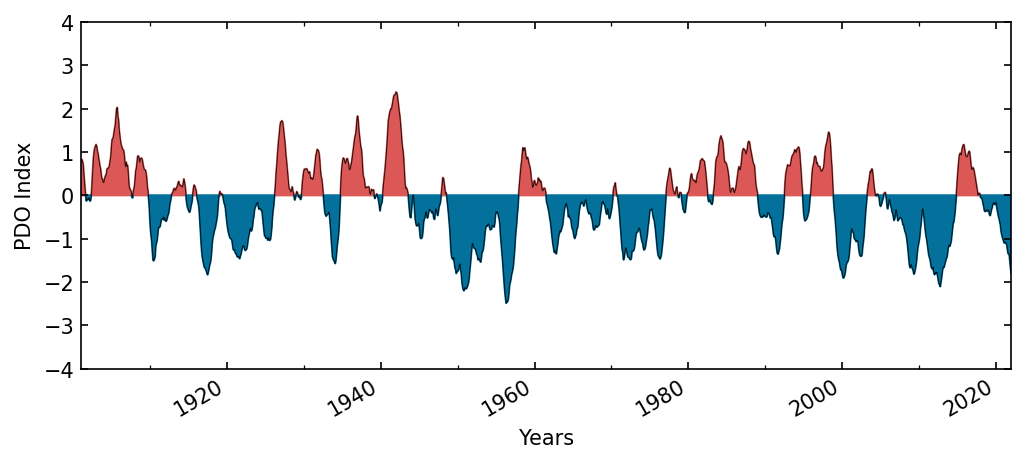

In [125]:
# Take a look
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

# Plot smoothed time series
ds = PDO.rolling(time=13).mean('time')
ds.plot(ax=ax, color='k', alpha=.8, lw=.5)
# Fill areas above and below zero with colors
ax.fill_between(ds.time, ds.values, where=ds.values>=0, interpolate=True, color='xkcd:pastel red')
ax.fill_between(ds.time, ds.values, where=ds.values<=0, interpolate=True, color='xkcd:ocean blue')

# fix-up figure
ax.margins(0)
ax.axhline(0, lw=.5, alpha=.5, color='k', zorder=-99)
ax.set_ylim([-4,4])
ax.set_ylabel('PDO Index')
ax.set_xlabel('Years')
ax.tick_params(which='both',direction='in',top=True, right=True)
ax.xaxis.set_minor_locator(mdates.YearLocator(10))